<a href="https://colab.research.google.com/github/routb68/Zummit_Infolab/blob/main/crowdcount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


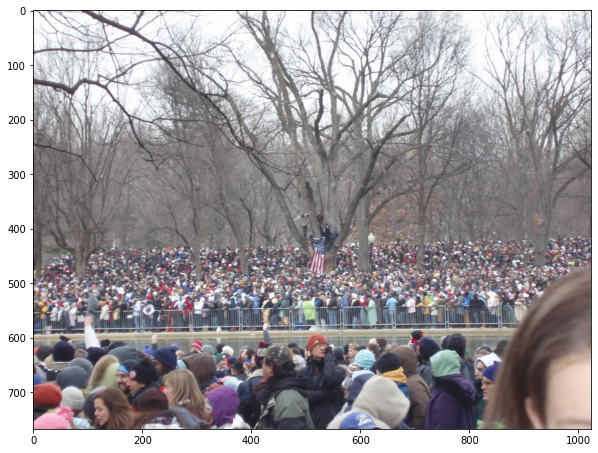

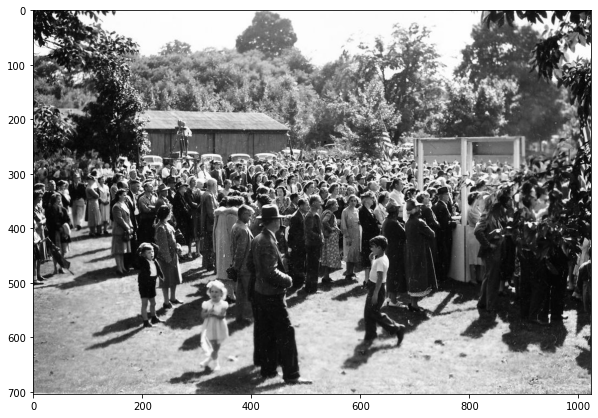

In [7]:
Example_Image_Path = "/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/images/IMG_1.jpg"
Example_Test_Path = "/content/drive/MyDrive/original/ShanghaiTech/part_A/test_data/images/IMG_1.jpg"
Example_Reading_Image = cv2.cvtColor(cv2.imread(Example_Image_Path),cv2.COLOR_BGR2RGB)
Example_Test_Image = cv2.cvtColor(cv2.imread(Example_Test_Path),cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10,10))

plt.imshow(Example_Reading_Image)

figure = plt.figure(figsize=(10,10))

plt.imshow(Example_Test_Image)

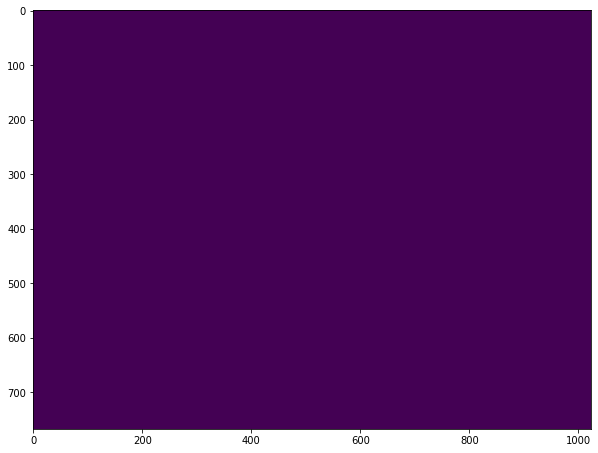

In [8]:
Example_Testing_Zeros = np.zeros((Example_Reading_Image.shape[0], Example_Reading_Image.shape[1]), dtype=np.float32)
figure = plt.figure(figsize=(10,10))

plt.imshow(Example_Testing_Zeros)

In [9]:
Example_Mat_Path = "/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/ground_truth/GT_IMG_1.mat"
Example_Testing_Mat = "/content/drive/MyDrive/original/ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_1.mat"
Example_Load_Mat = loadmat(Example_Mat_Path)
print(type(Example_Load_Mat))

<class 'dict'>


In [10]:
print(Example_Load_Mat.items())

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 18 20:06:05 2016'), ('__version__', '1.0'), ('__globals__', []), ('image_info', array([[array([[(array([[ 29.6225116 , 472.92022152],
                       [ 54.35533603, 454.96602305],
                       [ 51.79045053, 460.46220626],
                       ...,
                       [597.89732076, 688.27900015],
                       [965.77518336, 638.44693908],
                       [166.9965574 , 628.1873971 ]]), array([[1546]], dtype=uint16))]],
              dtype=[('location', 'O'), ('number', 'O')])                               ]],
      dtype=object))])


In [11]:
print(Example_Load_Mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])


In [12]:
Example_Image_Info = Example_Load_Mat.get("image_info")
print(type(Example_Image_Info))
print(Example_Image_Info.shape)
print(Example_Image_Info)

<class 'numpy.ndarray'>
(1, 1)
[[array([[(array([[ 29.6225116 , 472.92022152],
                 [ 54.35533603, 454.96602305],
                 [ 51.79045053, 460.46220626],
                 ...,
                 [597.89732076, 688.27900015],
                 [965.77518336, 638.44693908],
                 [166.9965574 , 628.1873971 ]]), array([[1546]], dtype=uint16))]],
        dtype=[('location', 'O'), ('number', 'O')])                               ]]


In [13]:
Example_Coordinates = Example_Image_Info[0][0][0][0][0]
print(Example_Coordinates)

[[ 29.6225116  472.92022152]
 [ 54.35533603 454.96602305]
 [ 51.79045053 460.46220626]
 ...
 [597.89732076 688.27900015]
 [965.77518336 638.44693908]
 [166.9965574  628.1873971 ]]


In [14]:
print(type(Example_Coordinates))
print(Example_Coordinates.shape)

<class 'numpy.ndarray'>
(1546, 2)


In [16]:
Example_Load_Mat_For_Testing = loadmat(Example_Testing_Mat)["image_info"]
Example_Testing_Coordinates = Example_Load_Mat_For_Testing[0][0][0][0][0]
print(Example_Testing_Coordinates[0:10])

[[163.48483516 341.77022977]
 [211.56475524 442.02197802]
 [333.29902098 517.72227772]
 [436.6197003  372.45954046]
 [391.60871129 374.50549451]
 [ 45.58673327 346.37362637]
 [ 11.317003   344.32767233]
 [ 15.40891109 325.4025974 ]
 [ 17.96635365 284.48351648]
 [ 45.58673327 288.57542458]]


Text(0.5, 1.0, 'testing')

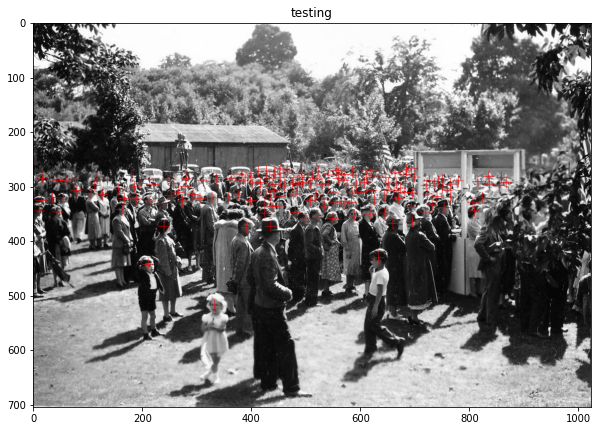

In [17]:
figure = plt.figure(figsize=(10,10))

for e_x_cor, e_y_cor in Example_Testing_Coordinates:
    e_x_cor = int(e_x_cor)
    e_y_cor = int(e_y_cor)
    cv2.drawMarker(Example_Test_Image, (e_x_cor, e_y_cor), (255, 0, 0),thickness=1)

plt.imshow(Example_Test_Image)
plt.title("testing")

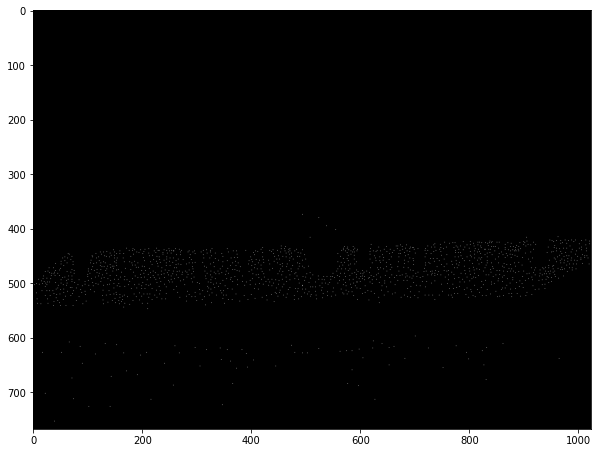

In [18]:
for x_cor_example, y_cor_example in Example_Coordinates:
    x_cor_example = int(x_cor_example)
    y_cor_example = int(y_cor_example)
    Example_Testing_Zeros[y_cor_example, x_cor_example] = 1
    
figure = plt.figure(figsize=(10,10))
plt.imshow(Example_Testing_Zeros,cmap="gray")

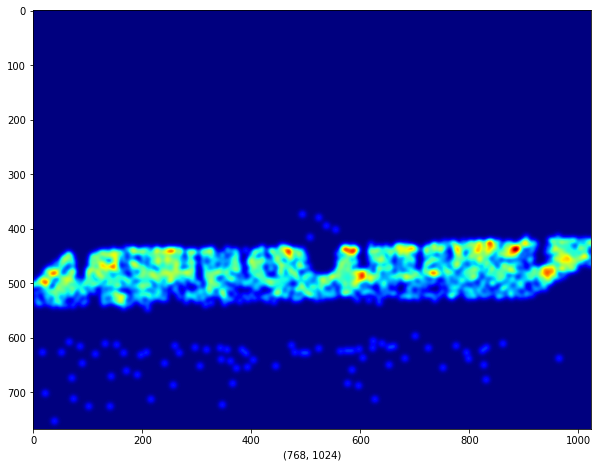

In [19]:
Gaussian_Image_Example = gaussian_filter(Example_Testing_Zeros,sigma=5,truncate=5*5)

figure = plt.figure(figsize=(10,10))
plt.xlabel(Gaussian_Image_Example.shape)
plt.imshow(Gaussian_Image_Example,cmap="jet")

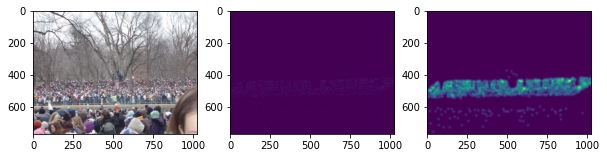

In [20]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

axis[0].imshow(Example_Reading_Image)
axis[1].imshow(Example_Testing_Zeros)
axis[2].imshow(Gaussian_Image_Example)

data

In [21]:
Ground_Truth_Path_A = Path("/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/ground_truth")
Images_Path_A = Path("/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/images")
Ground_Truth_Path_B = Path("/content/drive/MyDrive/original/ShanghaiTech/part_B/train_data/ground-truth")
Images_Path_B = Path("/content/drive/MyDrive/original/ShanghaiTech/part_B/train_data/images")

In [22]:
GT_List_A = list(Ground_Truth_Path_A.glob(r"*.mat"))
GT_List_B = list(Ground_Truth_Path_B.glob(r"*.mat"))
Images_List_A = list(Images_Path_A.glob(r"*.jpg"))
Images_List_B = list(Images_Path_B.glob(r"*.jpg"))
GT_List_A = sorted(GT_List_A)
GT_List_B = sorted(GT_List_B)
Images_List_A = sorted(Images_List_A)
Images_List_B = sorted(Images_List_B)
print("LEN A GT: ",len(GT_List_A))
print("---"*5)
print("LEN A IMAGES: ",len(Images_List_A))
print("---"*20)
print("LEN B GT: ",len(GT_List_B))
print("---"*5)
print("LEN B IMAGES: ",len(Images_List_B))

LEN A GT:  300
---------------
LEN A IMAGES:  300
------------------------------------------------------------
LEN B GT:  400
---------------
LEN B IMAGES:  400


In [23]:
print(GT_List_A[0])
print(Images_List_A[0])

/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/ground_truth/GT_IMG_1.mat
/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/images/IMG_1.jpg


In [24]:
print(GT_List_A[100])
print(Images_List_A[100])

/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/ground_truth/GT_IMG_19.mat
/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/images/IMG_19.jpg


In [25]:
Total_Mat_Path = []
Total_Image_Path = []

for ma_path,mb_path,ia_path,ib_path in zip(GT_List_A,GT_List_B,Images_List_A,Images_List_B):
    Total_Mat_Path.append(ma_path)
    Total_Mat_Path.append(mb_path)
    Total_Image_Path.append(ia_path)
    Total_Image_Path.append(ib_path)
print("MAIN MAT LEN: ",len(Total_Mat_Path))
print("---"*5)
print("MAIN IMAGE LEN: ",len(Total_Image_Path))

MAIN MAT LEN:  600
---------------
MAIN IMAGE LEN:  600


In [26]:
print(Total_Mat_Path[0])
print(Total_Image_Path[0])

/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/ground_truth/GT_IMG_1.mat
/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/images/IMG_1.jpg


In [27]:
print(Total_Mat_Path[100])
print(Total_Image_Path[100])


/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/ground_truth/GT_IMG_144.mat
/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/images/IMG_144.jpg


In [29]:
Image_Path_Series = pd.Series(Total_Image_Path,name="IMAGE").astype(str)
Mat_Path_Series = pd.Series(Total_Mat_Path,name="MAT").astype(str)
print("MAT LEN: ",len(Mat_Path_Series))
print("---"*5)
print("IMAGE LEN: ",len(Image_Path_Series))

MAT LEN:  600
---------------
IMAGE LEN:  600


In [30]:
print(Image_Path_Series[44])
print(Mat_Path_Series[44])

/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/images/IMG_119.jpg
/content/drive/MyDrive/original/ShanghaiTech/part_A/train_data/ground_truth/GT_IMG_119.mat


In [31]:
Image_Label_List = []
Mat_Label_List = []

total_added = []
total_not_added = []
time_count = 0

for x_images,x_mat in zip(Image_Path_Series.values,Mat_Path_Series.values):
    
    try:
        time_count += 1
        Reading_Image = cv2.cvtColor(cv2.imread(x_images),cv2.COLOR_BGR2RGB)

        Coordinates_x_info = loadmat(x_mat)["image_info"]
        Coordinates_x = Coordinates_x_info[0][0][0][0][0]

        Main_Zeros = np.zeros((Reading_Image.shape[0], Reading_Image.shape[1]), dtype=np.float32)
        for x_cor, y_cor in Coordinates_x:
            x_cor = int(x_cor)
            y_cor = int(y_cor)
            Main_Zeros[y_cor, x_cor] = 1

        Gaussian_Image_With_Coordinates = gaussian_filter(Main_Zeros,sigma=6,truncate=6*6)
        
        Resized_Image = cv2.resize(Reading_Image,(180,180))
        Resized_Gaussian_Image = cv2.resize(Gaussian_Image_With_Coordinates,(180,180))
        
        Image_Label_List.append(Resized_Image)
        Mat_Label_List.append(Resized_Gaussian_Image)
        total_added.append(str(time_count))
        
    except :
        total_not_added.append(str(time_count))
        pass

print(f"{len(total_not_added)} EPOCHS NOT ADDED")
print("---"*20)
print(f"{len(total_added)} EPOCHS ADDED")

0 EPOCHS NOT ADDED
------------------------------------------------------------
600 EPOCHS ADDED


In [32]:
print("MAT LEN: ",len(Mat_Label_List))
print("IMAGE LEN: ",len(Image_Label_List))


MAT LEN:  600
IMAGE LEN:  600


In [33]:
print("MAT IMAGE SHAPE: ",Mat_Label_List[0].shape)
print("ORIGINAL IMAGE SHAPE: ",Image_Label_List[0].shape)

MAT IMAGE SHAPE:  (180, 180)
ORIGINAL IMAGE SHAPE:  (180, 180, 3)


In [34]:
print("WHEN IT IS ARRAY MAT SHAPE: ",np.shape(np.array(Mat_Label_List)))
print("WHEN IT IS ARRAY IMAGE SHAPE: ",np.shape(np.array(Image_Label_List)))

WHEN IT IS ARRAY MAT SHAPE:  (600, 180, 180)
WHEN IT IS ARRAY IMAGE SHAPE:  (600, 180, 180, 3)


Text(0.5, 1.0, 'ORIGINAL')

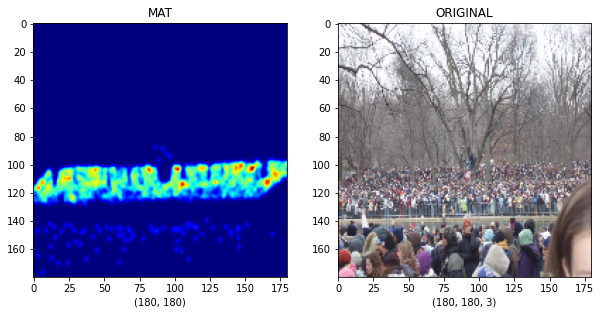

In [35]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List[0],cmap="jet")
axis[0].set_xlabel(Mat_Label_List[0].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List[0])
axis[1].set_xlabel(Image_Label_List[0].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

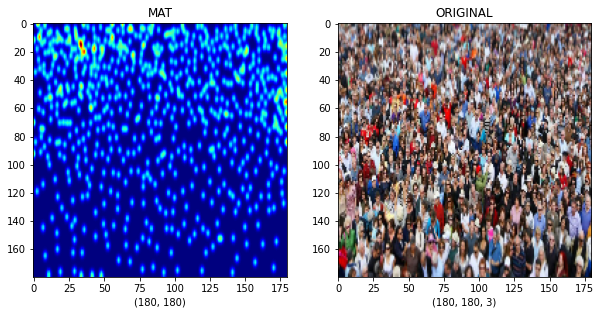

In [36]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List[220],cmap="jet")
axis[0].set_xlabel(Mat_Label_List[220].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List[220])
axis[1].set_xlabel(Image_Label_List[220].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

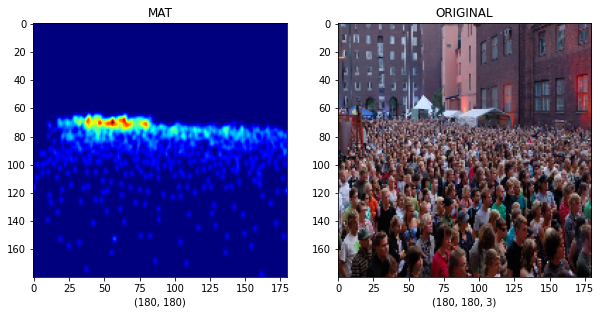

In [37]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List[22],cmap="jet")
axis[0].set_xlabel(Mat_Label_List[22].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List[22])
axis[1].set_xlabel(Image_Label_List[22].shape)
axis[1].set_title("ORIGINAL")

Text(0.5, 1.0, 'ORIGINAL')

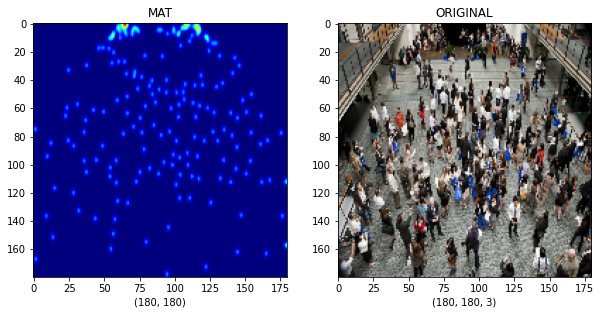

In [38]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Mat_Label_List[302],cmap="jet")
axis[0].set_xlabel(Mat_Label_List[302].shape)
axis[0].set_title("MAT")
axis[1].imshow(Image_Label_List[302])
axis[1].set_xlabel(Image_Label_List[302].shape)
axis[1].set_title("ORIGINAL")

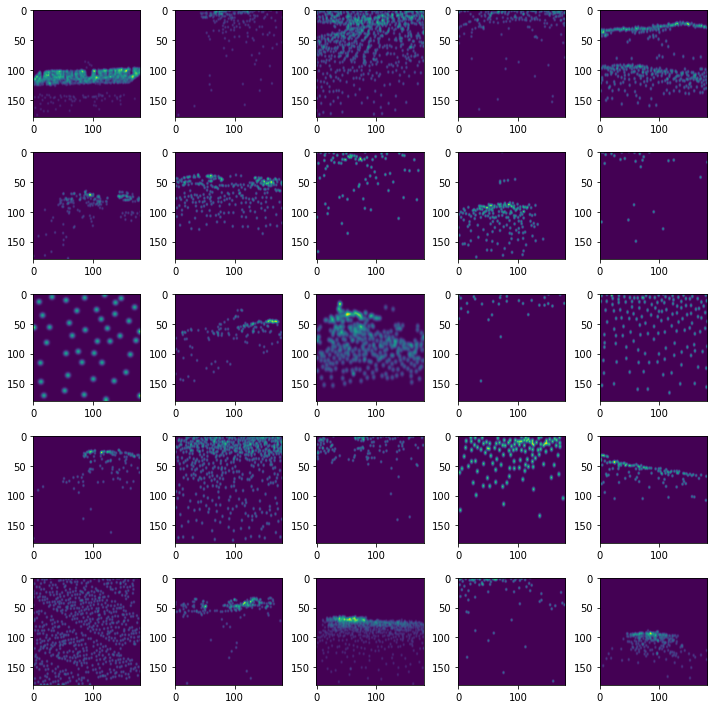

In [39]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operation in enumerate(axis.flat):
    
    Mat_Picking_Image = Mat_Label_List[indexing]
    operation.imshow(Mat_Picking_Image)
    
plt.tight_layout()
plt.show()

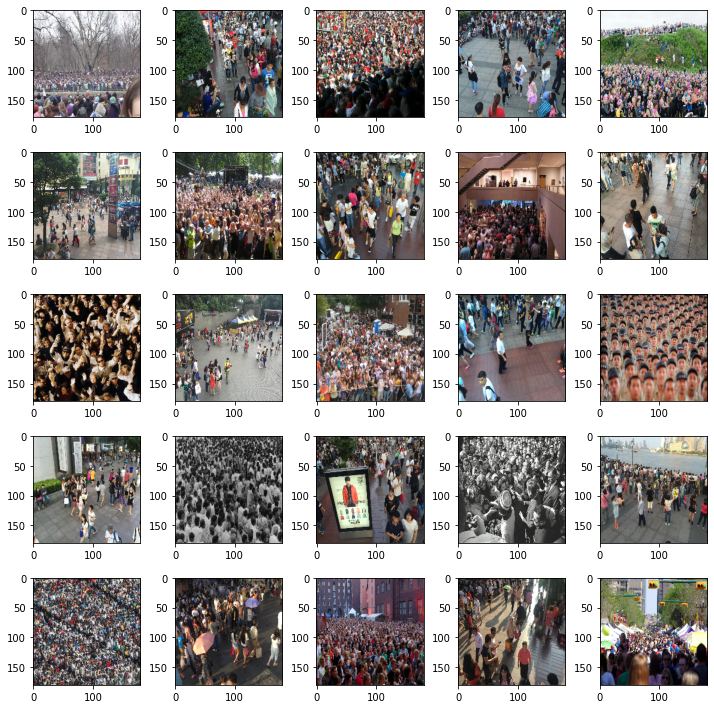

In [40]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operation in enumerate(axis.flat):
    
    Image_Picking_Image = Image_Label_List[indexing]
    operation.imshow(Image_Picking_Image)
    
plt.tight_layout()
plt.show()

converting to numpy array

In [41]:
X_Train = np.array(Image_Label_List,dtype="float32")
X_Test = np.array(Mat_Label_List,dtype="float32")
print("TRAIN SHAPE: ",X_Train.shape)
print("TEST SHAPE: ",X_Test.shape)

TRAIN SHAPE:  (600, 180, 180, 3)
TEST SHAPE:  (600, 180, 180)


In [42]:
X_Train = X_Train / 255.
X_Test = X_Test / 255.

Text(0.5, 1.0, 'ORIGINAL')

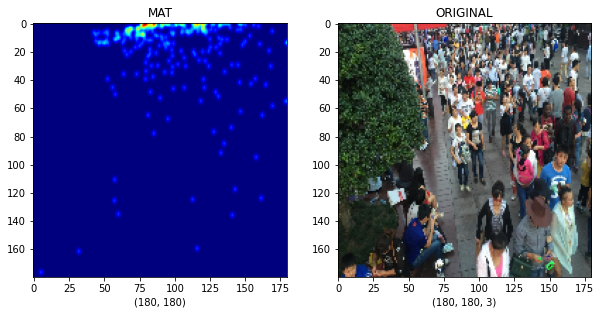

In [43]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(X_Test[1],cmap="jet")
axis[0].set_xlabel(X_Test[1].shape)
axis[0].set_title("MAT")
axis[1].imshow(X_Train[1])
axis[1].set_xlabel(X_Train[1].shape)
axis[1].set_title("ORIGINAL")

CONV2D - CONV2DTRANPOSE AUTO ENCODER PROCESS

In [44]:
#callback
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")
#parameter
compile_loss = "mse"
compile_optimizer = Adam(lr=0.0000001)
output_class = 1

#encoder
Encoder_AE = Sequential()
Encoder_AE.add(Conv2D(32,(2,2),kernel_initializer = 'he_normal'))
Encoder_AE.add(BatchNormalization())
Encoder_AE.add(ReLU())

Encoder_AE.add(Conv2D(64,(2,2),kernel_initializer = 'he_normal'))
Encoder_AE.add(BatchNormalization())
Encoder_AE.add(ReLU())

Encoder_AE.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal'))
Encoder_AE.add(BatchNormalization())
Encoder_AE.add(ReLU())

Encoder_AE.add(Conv2D(256,(2,2),kernel_initializer = 'he_normal'))
Encoder_AE.add(BatchNormalization())
Encoder_AE.add(ReLU())

#decoder
Decoder_AE = Sequential()
Decoder_AE.add(Conv2DTranspose(128,(2,2)))
Decoder_AE.add(ReLU())

Decoder_AE.add(Conv2DTranspose(64,(2,2)))
Decoder_AE.add(ReLU())

Decoder_AE.add(Conv2DTranspose(32,(2,2)))
Decoder_AE.add(ReLU())

Decoder_AE.add(Conv2DTranspose(output_class,(2,2)))
Decoder_AE.add(ReLU())

Auto_Encoder = Sequential([Encoder_AE,Decoder_AE])
Auto_Encoder.compile(loss=compile_loss,optimizer=compile_optimizer)

In [ ]:
Model_AutoEncoder_Histoyr = Auto_Encoder.fit(X_Train,X_Test,epochs=30,callbacks=[Checkpoint_Model])

Epoch 1/30
19/19 [==============================] - ETA: 0s - loss: 0.0149 

19/19 [==============================] - 578s 30s/step - loss: 0.0149
Epoch 2/30
19/19 [==============================] - ETA: 0s - loss: 0.0142 

19/19 [==============================] - 573s 30s/step - loss: 0.0142
Epoch 3/30
19/19 [==============================] - ETA: 0s - loss: 0.0139 

19/19 [==============================] - 580s 31s/step - loss: 0.0139
Epoch 4/30
19/19 [==============================] - ETA: 0s - loss: 0.0133 

19/19 [==============================] - 567s 30s/step - loss: 0.0133
Epoch 5/30
16/19 [========================>.....] - ETA: 1:32 - loss: 0.0129